In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


In [4]:
gdp_df.shape

(8219, 4)

There are 8219 rows and 4 columns in the gdp_percapita database

In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

The data types are object, int64, and float64

## 6. Drop the Value Footnotes column and rename the remaining columns "Country", "Year", and "GDP_Per_Capita" 

In [6]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [7]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [8]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


## 7a How many countries have data for all years?
### 228

In [9]:
years = gdp_df.groupby('Country').count()
years

,Year,GDP_Per_Capita
Country,,
Afghanistan,24,24
Africa Eastern and Southern,34,34
Africa Western and Central,34,34
Albania,34,34
Algeria,34,34
...,...,...
Virgin Islands,21,21
West Bank and Gaza,30,30
World,34,34


In [79]:
years = years.reset_index()
years

,index,Country,Year,GDP_Per_Capita
0,0,Afghanistan,24,24
1,1,Africa Eastern and Southern,34,34
2,2,Africa Western and Central,34,34
3,3,Albania,34,34
4,4,Algeria,34,34
...,...,...,...,...
242,242,Virgin Islands,21,21
243,243,West Bank and Gaza,30,30
244,244,World,34,34
245,245,Zambia,34,34


In [87]:
gdp_df.value_counts('Country').max()

34

In [89]:
years.loc[years.Year == gdp_df.value_counts('Country').max()]

,index,Country,Year,GDP_Per_Capita
1,1,Africa Eastern and Southern,34,34
2,2,Africa Western and Central,34,34
3,3,Albania,34,34
4,4,Algeria,34,34
5,5,Andorra,34,34
...,...,...,...,...
240,240,Vanuatu,34,34
241,241,Viet Nam,34,34
244,244,World,34,34
245,245,Zambia,34,34


## 7b: Which countries were missing years?

In [90]:
years.loc[years.Year== gdp_df.value_counts('Country').max()-1]

,index,Country,Year,GDP_Per_Capita
23,23,Bhutan,33,33
125,125,Lebanon,33,33
200,200,Somalia,33,33
216,216,Syrian Arab Republic,33,33
225,225,Tonga,33,33


## 7c: The number of total observations increases year over year until 2023

In [13]:
countries = gdp_df.groupby('Year').count()
countries

,Country,GDP_Per_Capita
Year,,
1990,233,233
1991,234,234
1992,234,234
1993,234,234
1994,235,235
1995,236,236
1996,236,236
1997,238,238
1998,238,238


## 8. Create plots to show distribution of GDP for 2020

In [14]:
gdp2020 = gdp_df.loc[gdp_df.Year == 2020]
gdp2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


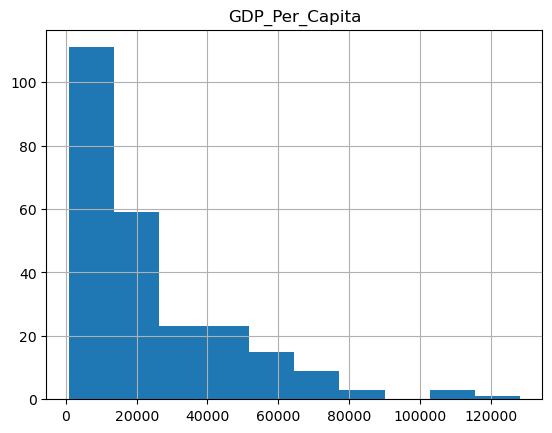

In [15]:
##histogram
gdp2020.hist('GDP_Per_Capita');

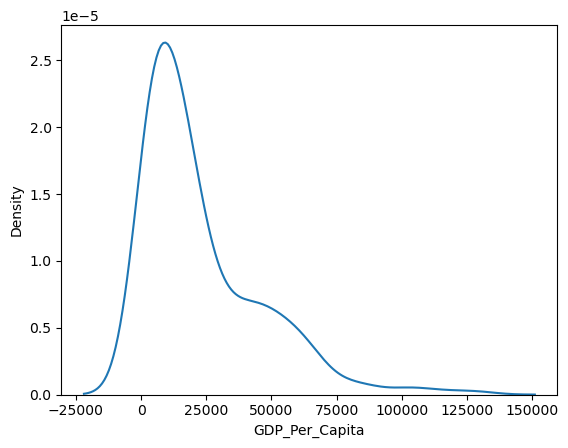

In [16]:
##density plot
sns.kdeplot(gdp2020['GDP_Per_Capita']);

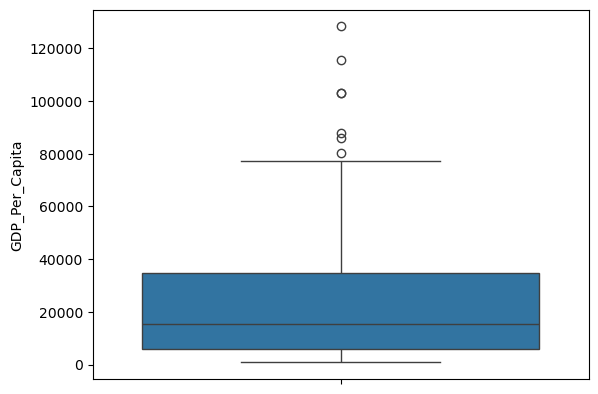

In [17]:
##boxplot
sns.boxplot(y=gdp2020["GDP_Per_Capita"]);

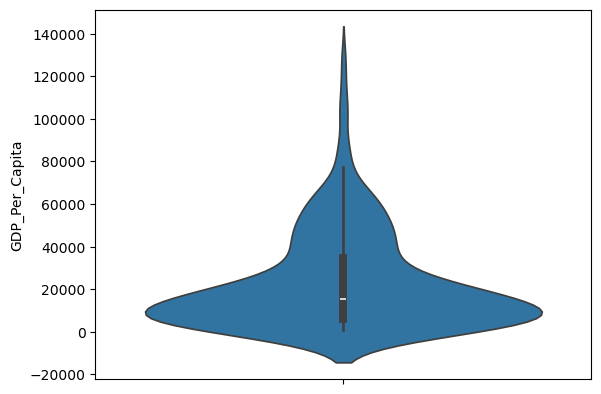

In [18]:
##violin chart
sns.violinplot(y=gdp2020['GDP_Per_Capita']);

## What is the median GDP value in 2020?

###15309.24

In [19]:
gdp2020.GDP_Per_Capita.median()

15309.23598817024

In [20]:
gdp_df


,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


## Create visualizations to complare GDP for the years 1990, 2000, 2010, and 2020. 

In [21]:
gdp_decades = gdp_df.loc[((gdp_df.Year == 1990) | (gdp_df.Year == 2000) | (gdp_df.Year == 2010) | (gdp_df.Year == 2020))]

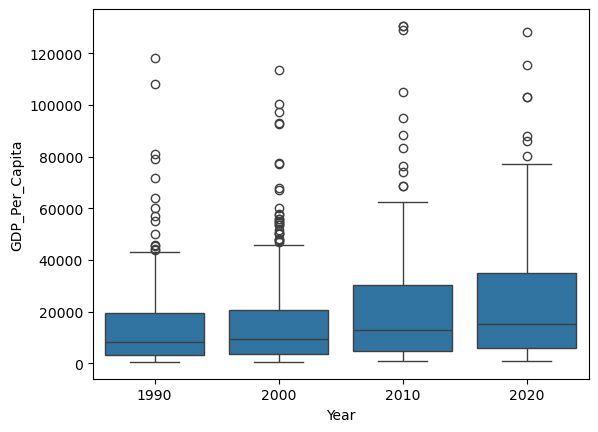

In [22]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"]);

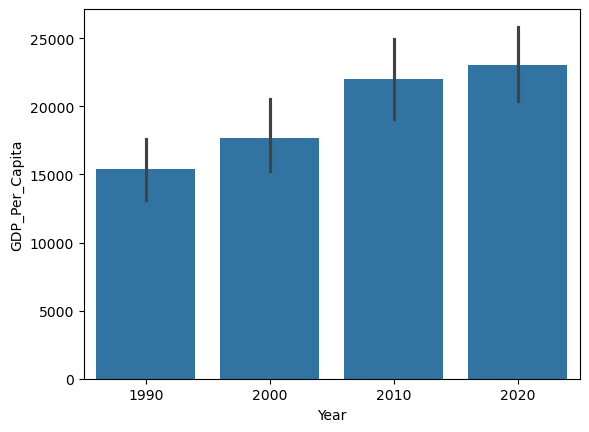

In [23]:
sns.barplot(x="Year", y="GDP_Per_Capita", data=gdp_decades);


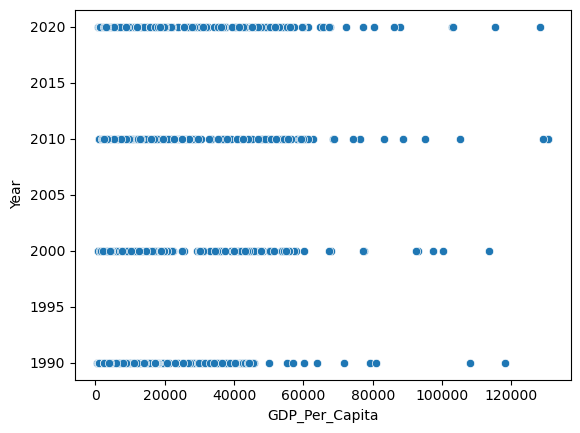

In [24]:
sns.scatterplot(x=gdp_decades["GDP_Per_Capita"], y=gdp_decades["Year"]);

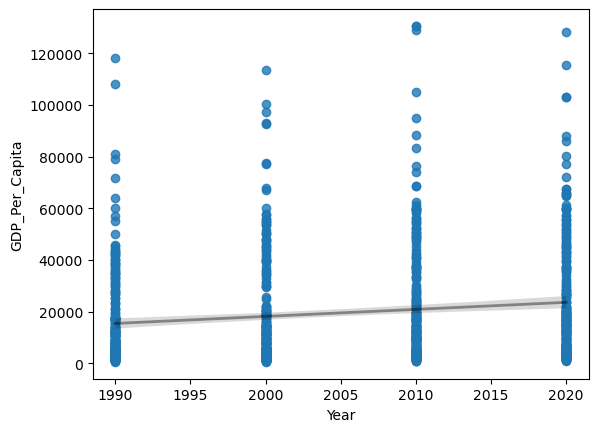

In [25]:

sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "black", "linewidth":2, 'alpha' : .4});
 

##10: GDP has increased over time. The box chart and scatterplots clearly show the outliers in each year, although the scatterplots make it a little 
##less obvious that we're looking at 4 specific years. The bar chart makes the amount of increase year over year clearest.

In [26]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


## 11 Which country was the first to have a GDP greater than 100k?
### Brunei and UAE

In [91]:
gdp_first_100k = gdp_df.loc[gdp_df.GDP_Per_Capita > 100000]

In [92]:
gdp_first_100k.sort_values('Year')


,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
972,Brunei,1992,111457.220910
...,...,...,...
4457,"Macao SAR, China",2023,104961.643485
3490,Ireland,2023,115401.125283
4423,Luxembourg,2023,130373.477942
6511,Singapore,2023,127543.554752


## 12 Which country had the highest GDP in 2020? Create a plot showing this country's GDP over time

In [100]:
gdp2020 = gdp_df.loc[gdp_df.Year ==2020]

In [111]:
richest = gdp2020.nlargest(1, 'GDP_Per_Capita').Country

In [112]:
gdp_high = gdp_df.loc[gdp_df.Country.isin(richest)]

(0.0, 150000.0)

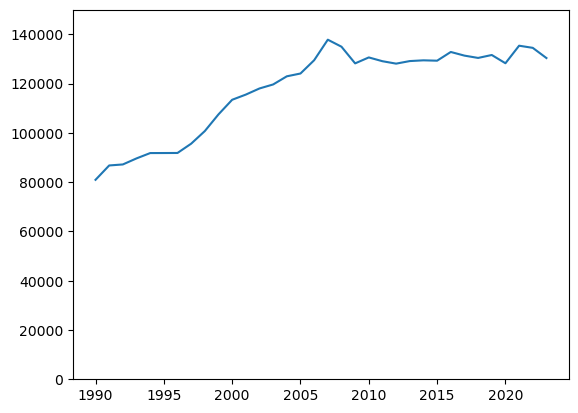

In [113]:
plt.plot(gdp_high.Year, gdp_high.GDP_Per_Capita)
plt.ylim(bottom = 0, top = 150000)
##12b

## 13 Which country had the lowest GDP in 2020? Create a plot showing that country's GDP over time

In [114]:
smallest = gdp2020.nsmallest(1, 'GDP_Per_Capita').Country

In [115]:
gdp_low = gdp_df.loc[gdp_df.Country.isin(smallest)]

(0.0, 1466.1674858591664)

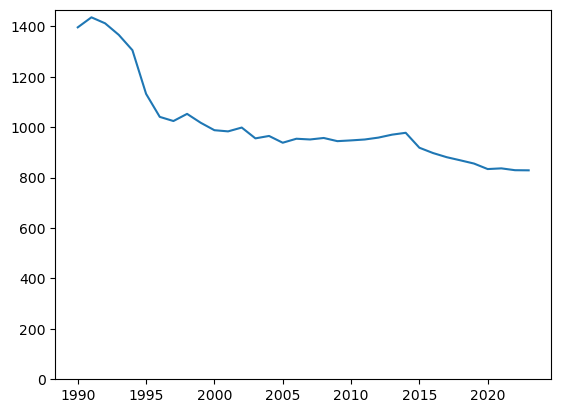

In [116]:
plt.plot(gdp_low.Year, gdp_low.GDP_Per_Capita)
plt.ylim(bottom = 0)
##13b

## 13b Is it true that most countries had higher GDP in 2020 than in 1990? Which countries had lower GDP in 2020 than 1990?

In [36]:
gdp1990 = gdp_df.loc[gdp_df.Year == 1990]
gdp1990

,Country,Year,GDP_Per_Capita
57,Africa Eastern and Southern,1990,3386.854480
91,Africa Western and Central,1990,3299.401375
125,Albania,1990,5327.747458
159,Algeria,1990,11728.545729
193,Andorra,1990,50036.300776
...,...,...,...
8031,Vanuatu,1990,3101.680551
8065,Viet Nam,1990,2467.964601
8150,World,1990,11207.386344
8184,Zambia,1990,2425.111287


In [37]:
lower_gdp = pd.merge(gdp2020, gdp1990,
                     left_on = 'Country', right_on = 'Country',
                     how = 'inner')
lower_gdp.head()

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
0,Africa Eastern and Southern,2020,3861.111238,1990,3386.854480
1,Africa Western and Central,2020,4622.731427,1990,3299.401375
2,Albania,2020,14650.395929,1990,5327.747458
3,Algeria,2020,14194.155748,1990,11728.545729
4,Andorra,2020,55488.490299,1990,50036.300776


In [38]:
lower_gdp = lower_gdp.loc[lower_gdp.GDP_Per_Capita_x < lower_gdp.GDP_Per_Capita_y]

In [39]:
lower_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 10 to 232
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           24 non-null     object 
 1   Year_x            24 non-null     int64  
 2   GDP_Per_Capita_x  24 non-null     float64
 3   Year_y            24 non-null     int64  
 4   GDP_Per_Capita_y  24 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ KB


## Read in the internet data frame and fix the error

In [40]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)

In [41]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [42]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object

## 15: Drop the value footnote

In [43]:
internet_df = internet_df.drop(columns = 'Value Footnotes')
internet_df

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


## 15b Rename the Columns

In [44]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [45]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


## 16 What do you notice about number of observations per year?
1990 is abnormally high and 2023 is abnormally low. Other than that, observations increase from 1991-207 pretty consistently and then start to decline again. 

In [46]:
countries2 = internet_df.groupby('Year').count()

In [47]:
countries2

,Country,Internet_Users_Pct
Year,,
1990,226,226
1991,39,39
1992,50,50
1993,66,66
1994,92,92
1995,141,141
1996,177,177
1997,188,188
1998,195,195


## 17 What is the first year to have a non-zero internet users pct?
The first non zero internet percent is in 1990

In [48]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [49]:
first_non_zero = internet_df.loc[internet_df.Internet_Users_Pct > 0]
first_non_zero

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6077,Zimbabwe,1998,0.081648
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684


In [50]:
first_non_zero.sort_values('Year')

,Country,Year,Internet_Users_Pct
2034,France,1990,0.052778
3054,Korea (Republic of),1990,0.023265
2192,Germany,1990,0.125892
5150,Spain,1990,0.012874
4197,Norway,1990,0.707299
...,...,...,...
340,Azerbaijan,2023,88.000000
2159,Germany,2023,92.476400
5266,Sweden,2023,95.703300
5586,Türkiye,2023,85.960700


## 18 How does dist of internet users percent differ from 2000 and 2014?

In [51]:
dist2000 = internet_df.loc[internet_df.Year == 2000]

In [52]:
dist2014 = internet_df.loc[internet_df.Year == 2014]

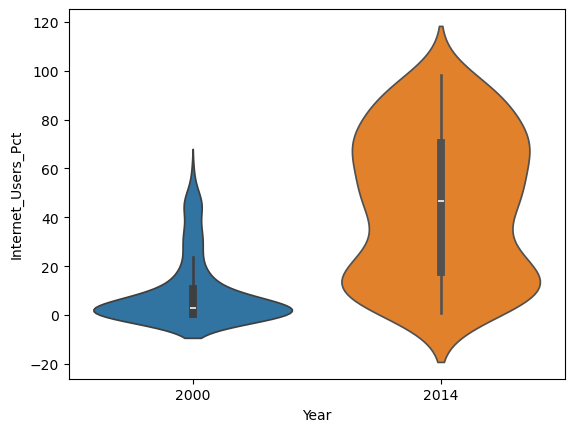

In [53]:
sns.violinplot(x=dist2000['Year'], y=dist2000['Internet_Users_Pct'])
sns.violinplot(x=dist2014['Year'], y=dist2014['Internet_Users_Pct']);


## 19 For how many countries was internet usage below 5% in 2014
10

In [54]:
len(dist2014.loc[dist2014.Internet_Users_Pct < 5])

10

## 20 Merge the 2 DFs. Keep all rows from each. Call it gdp_and_internet_use. 

In [55]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on =['Country', 'Year'])
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2927.245144,17.600000
1,Afghanistan,2018,2902.392113,16.800000
2,Afghanistan,2017,2952.998916,13.500000
3,Afghanistan,2016,2958.785399,11.000000
4,Afghanistan,2015,2967.692067,8.260000
...,...,...,...,...
4798,Zimbabwe,1997,4304.406272,0.033080
4799,Zimbabwe,1996,4271.479930,0.016790
4800,Zimbabwe,1995,3935.280057,0.007684
4801,Zimbabwe,1994,3965.730986,0.001739


## 21: Find the 3 countries with with highest internet usage in 2014. Use a seaborn FacetGrid to see GDP over time for these three.

In [56]:
gdp_and_internet_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014]

In [57]:
gdp_and_internet_2014.nlargest(3, 'Internet_Users_Pct').Country

1992    Iceland
540     Bermuda
3268     Norway
Name: Country, dtype: object

In [58]:
gdp_and_internet_3largest = gdp_and_internet_use.loc[(gdp_and_internet_use.Country.isin(gdp_and_internet_2014.nlargest(3, 'Internet_Users_Pct').Country))] #== 'Iceland') | (gdp_and_internet_use.Country =='Falkland (Malvinas) Islands') | (gdp_and_internet_use.Country =='Bermuda')]

In [59]:
gdp_and_internet_3largest

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
537,Bermuda,2017,95666.163117,98.370000
538,Bermuda,2016,92519.400772,98.000000
539,Bermuda,2015,93109.454604,98.323600
540,Bermuda,2014,92298.387811,96.800000
541,Bermuda,2013,95777.858938,95.300000
...,...,...,...,...
3288,Norway,1994,64373.901096,4.152450
3289,Norway,1993,61626.115045,2.783990
3290,Norway,1992,60278.978538,2.216370
3291,Norway,1991,58535.572877,1.407400


In [60]:
gdp_and_internet_3largest.loc[gdp_and_internet_3largest.Country == 'Falkland (Malvinas) Islands']

,Country,Year,GDP_Per_Capita,Internet_Users_Pct


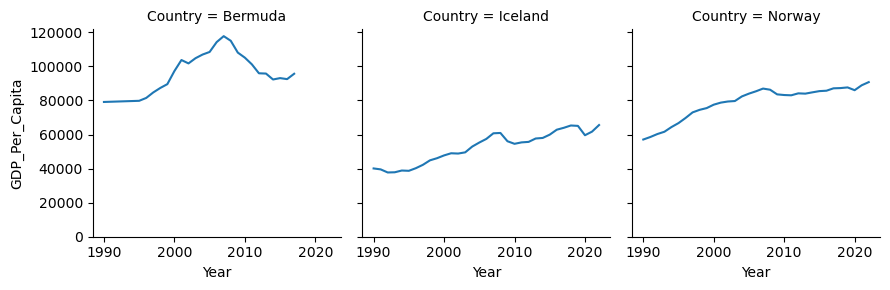

In [61]:
g = sns.FacetGrid(gdp_and_internet_3largest, col = 'Country')
g.map(sns.lineplot, 'Year',  'GDP_Per_Capita')
plt.ylim(bottom = 0);

## 22 Show just the year 2014. Create a plot to compare internet usage and GDP in 2014

In [62]:
gdp_and_internet_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,3017.942544,7.0000
27,Albania,2014,12788.747231,54.3000
56,Algeria,2014,15073.762940,29.5000
85,Andorra,2014,59929.244467,86.1000
112,Angola,2014,10250.592404,21.3623
...,...,...,...,...
4666,Uzbekistan,2014,7145.109807,35.5000
4695,Vanuatu,2014,3320.379187,18.8000
4723,Viet Nam,2014,8751.882806,41.0000
4751,Zambia,2014,3585.577485,6.5000


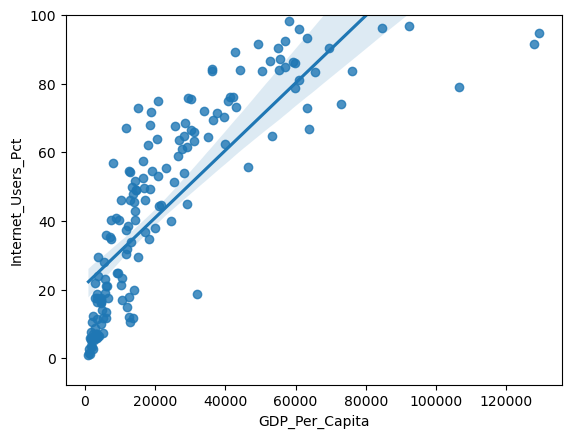

In [63]:
sns.regplot (data = gdp_and_internet_2014, x = 'GDP_Per_Capita', y = 'Internet_Users_Pct')
plt.ylim(top = 100);

## 24 Use qcut to divide countries in gdp2014 into three groups-Low, Medium, High-labeled 'GDP_Group'

In [64]:
gdp2014 = gdp_df.loc[gdp_df.Year == 2014]
gdp2014

,Country,Year,GDP_Per_Capita
9,Afghanistan,2014,3017.942544
33,Africa Eastern and Southern,2014,4052.851526
67,Africa Western and Central,2014,4816.917355
101,Albania,2014,12788.747231
135,Algeria,2014,15073.762940
...,...,...,...
8074,Virgin Islands,2014,42853.898660
8096,West Bank and Gaza,2014,5990.426615
8126,World,2014,17307.606891
8160,Zambia,2014,3585.577485


In [67]:
gdp2014['label'] = pd.qcut(gdp2014.GDP_Per_Capita, 3, labels=["low", "medium", "high"])

C:\Users\jenni\AppData\Local\Temp\ipykernel_40700\335029392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp2014['label'] = pd.qcut(gdp2014.GDP_Per_Capita, 3, labels=["low", "medium", "high"])


In [68]:
gdp2014

,Country,Year,GDP_Per_Capita,label
9,Afghanistan,2014,3017.942544,low
33,Africa Eastern and Southern,2014,4052.851526,low
67,Africa Western and Central,2014,4816.917355,low
101,Albania,2014,12788.747231,medium
135,Algeria,2014,15073.762940,medium
...,...,...,...,...
8074,Virgin Islands,2014,42853.898660,high
8096,West Bank and Gaza,2014,5990.426615,low
8126,World,2014,17307.606891,medium
8160,Zambia,2014,3585.577485,low
